<a href="https://colab.research.google.com/github/RonitGandhi/Hacksprint_PS01_InputOutput/blob/model_branch/LSTM_CRYPTOCURRENCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Package Prerequisites**

In [ ]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=e8b778e97321fe2929dde8cae820ff542601404b1392a8714eda297afbe27733
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 11.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=c41dbfd77ec09a5383bbbc4b08d750d9125b22c8b1470f53405ee748236d622b
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [75]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 10, 5
RANDOM_SEED = 100
np.random.seed(RANDOM_SEED)

#**1. Bitcoin Data**

In [76]:
# Bitcoin Data
ticker_btc = ['BTC-USD']
df_btc = pd.DataFrame()
temp_df = yf.download(ticker_btc,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_btc = df_btc.append(temp_df)
df_btc = df_btc.reset_index(drop=False)
df_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


#**2. Ethereum Data**

In [77]:
# Ethereum Data
ticker_eth = ['ETH-USD']
df_eth = pd.DataFrame()
temp_df = yf.download(ticker_eth,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_eth = df_eth.append(temp_df)
df_eth = df_eth.reset_index(drop=False)
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100


#**3. Binance Coin Data**

In [78]:
# Binance Coin Data
ticker_bnb = ['BNB-USD']
df_bnb = pd.DataFrame()
temp_df = yf.download(ticker_bnb,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_bnb = df_bnb.append(temp_df)
df_bnb = df_bnb.reset_index(drop=False)
df_bnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-25,0.115203,0.115841,0.101531,0.105870,0.105870,145269
1,2017-07-26,0.105893,0.109013,0.099266,0.105138,0.105138,200395
2,2017-07-27,0.105108,0.108479,0.100888,0.107737,0.107737,344499
3,2017-07-28,0.107632,0.109019,0.101473,0.104067,0.104067,342568
4,2017-07-29,0.104782,0.111264,0.101108,0.107811,0.107811,340218


#**4. Cardano Data**

In [79]:
# Cardano Data
ticker_ada = ['ADA-USD']
df_ada = pd.DataFrame()
temp_df = yf.download(ticker_ada,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_ada = df_ada.append(temp_df)
df_ada = df_ada.reset_index(drop=False)
df_ada.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510


#**5. Tether Data**

In [80]:
# Tether Data
ticker_usdt = ['USDT-USD']
df_usdt = pd.DataFrame()
temp_df = yf.download(ticker_usdt,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_usdt = df_usdt.append(temp_df)
df_usdt = df_usdt.reset_index(drop=False)
df_usdt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-25,1.210160,1.215490,1.209580,1.211100,1.211100,6
1,2015-02-26,1.210420,1.212320,1.194710,1.205740,1.205740,6
2,2015-03-02,0.571249,0.607890,0.568314,0.606502,0.606502,3
3,2015-03-03,0.605129,0.606229,0.604416,0.606229,0.606229,3
4,2015-03-06,1.000000,1.000000,1.000000,1.000000,1.000000,93


#**6. XRP Data**

In [81]:
# XRP Data
ticker_xrp = ['XRP-USD']
df_xrp = pd.DataFrame()
temp_df = yf.download(ticker_xrp,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_xrp = df_xrp.append(temp_df)
df_xrp = df_xrp.reset_index(drop=False)
df_xrp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.005123,0.005803,0.005123,0.005399,0.005399,1281960
1,2014-09-18,0.005398,0.005521,0.005091,0.005135,0.005135,491147
2,2014-09-19,0.005134,0.005167,0.004873,0.004942,0.004942,407109
3,2014-09-20,0.004942,0.004954,0.004736,0.004772,0.004772,322621
4,2014-09-21,0.004768,0.004791,0.004540,0.004570,0.004570,309571


#**7. Solana Data**

In [82]:
# Solana Data
ticker_sol1 = ['SOL1-USD']
df_sol1 = pd.DataFrame()
temp_df = yf.download(ticker_sol1,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_sol1 = df_sol1.append(temp_df)
df_sol1 = df_sol1.reset_index(drop=False)
df_sol1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


#**8. Polkadot Data**

In [83]:
# Polkadot Data
ticker_pol = ['DOT1-USD']
df_pol = pd.DataFrame()
temp_df = yf.download(ticker_pol,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_pol = df_pol.append(temp_df)
df_pol = df_pol.reset_index(drop=False)
df_pol.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-20,2.787857,3.077784,2.692896,2.900080,2.900080,48819867
1,2020-08-21,2.896923,3.090093,2.730919,2.875028,2.875028,49313137
2,2020-08-22,2.878570,4.510613,2.816762,4.484690,4.484690,485801096
3,2020-08-23,4.487058,4.487058,3.716271,3.967066,3.967066,320749483
4,2020-08-24,3.987413,4.783158,3.812670,4.602614,4.602614,407690171


#**9. USD Coin Data**

In [84]:
# USD Coin Data
ticker_usd = ['USDC-USD']
df_usd = pd.DataFrame()
temp_df = yf.download(ticker_usd,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_usd = df_usd.append(temp_df)
df_usd = df_usd.reset_index(drop=False)
df_usd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,1.00410,1.00768,1.00190,1.00221,1.00221,382900
1,2018-10-09,1.00427,1.00833,1.00003,1.00686,1.00686,108803
2,2018-10-10,1.00494,1.01908,1.00397,1.00962,1.00962,711783
3,2018-10-11,1.00994,1.03123,1.00173,1.00978,1.00978,4177290
4,2018-10-12,1.00861,1.01871,1.00114,1.01272,1.01272,1322240


#**10. Doge Coin Data**

In [85]:
# Doge Coin Data
ticker_doge = ['DOGE-USD']
df_doge = pd.DataFrame()
temp_df = yf.download(ticker_doge,
                    start = '2014-01-01',
                    end = '2021-12-31',
                    progress = False)
df_doge = df_doge.append(temp_df)
df_doge = df_doge.reset_index(drop=False)
df_doge.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140


#**1. Bitcoin Historic Data**

Text(0, 0.5, 'Close Price (USD)')

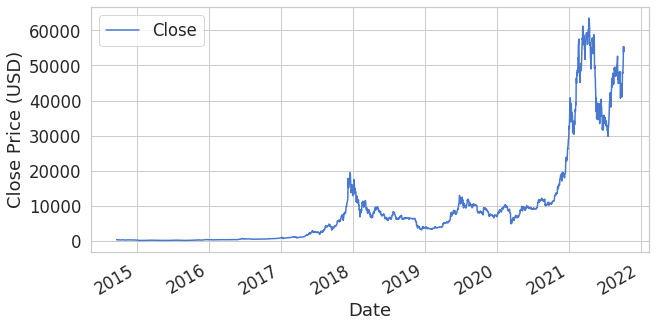

In [86]:
ax = df_btc.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**2. Ethereum Historic Data**

Text(0, 0.5, 'Close Price (USD)')

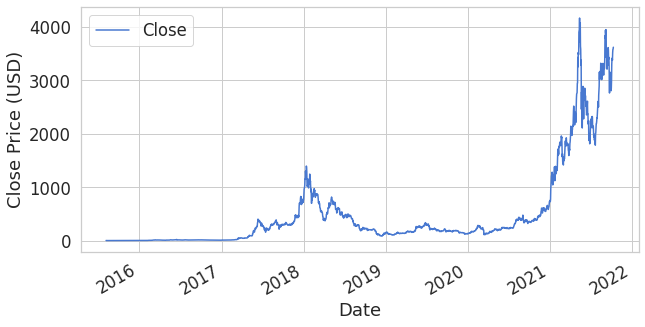

In [87]:
ax = df_eth.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**3. Binance Coin Historic Data**

Text(0, 0.5, 'Close Price (USD)')

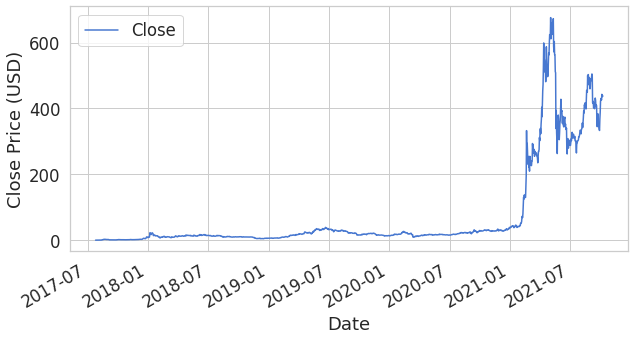

In [88]:
ax = df_bnb.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**4. Cardano Historic Data**

Text(0, 0.5, 'Close Price (USD)')

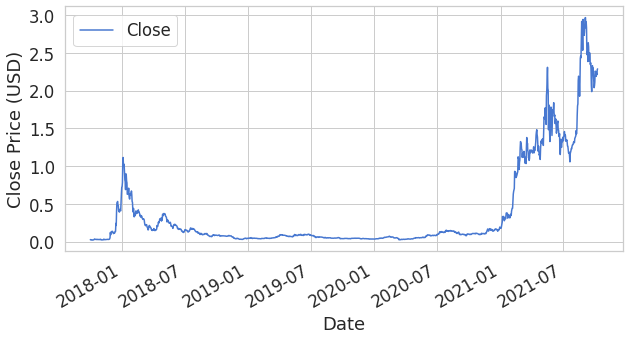

In [89]:
ax = df_ada.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**5. Tether Historic Data**

Text(0, 0.5, 'Close Price (USD)')

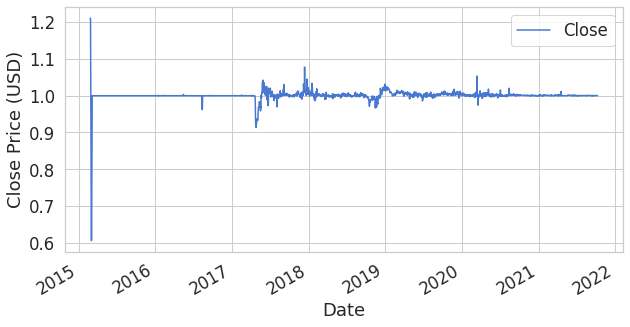

In [90]:
ax = df_usdt.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**6. XRP Historic Data**

Text(0, 0.5, 'Close Price (USD)')

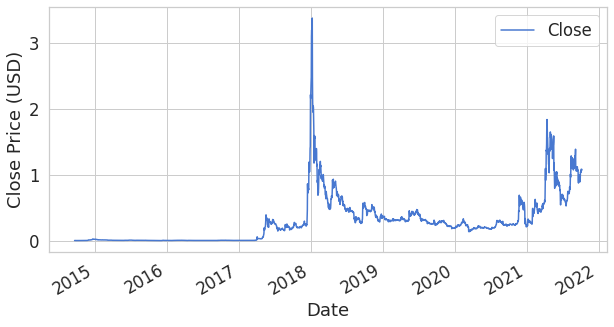

In [91]:
ax = df_xrp.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**7. Solana Historic Data**

Text(0, 0.5, 'Close Price (USD)')

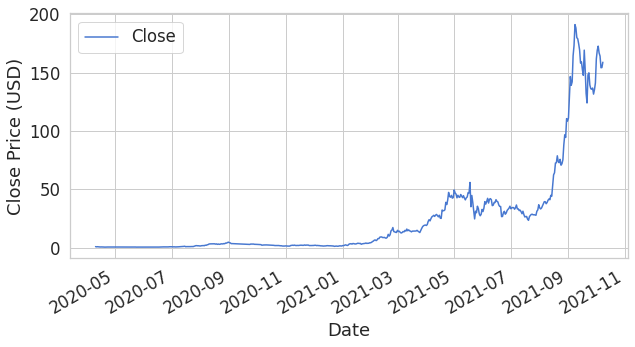

In [92]:
ax = df_sol1.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**8. Polkadot Historic Data**

Text(0, 0.5, 'Close Price (USD)')

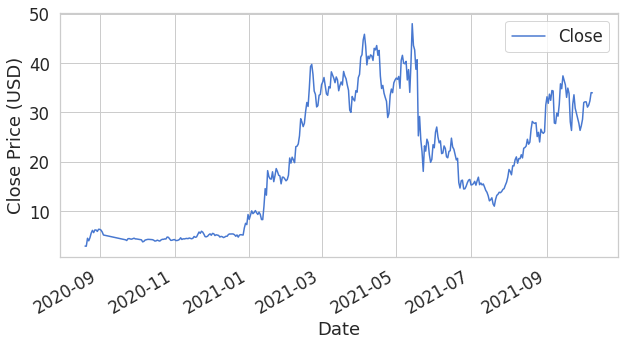

In [93]:
ax = df_pol.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**9. USD Coin Historic Data**

Text(0, 0.5, 'Close Price (USD)')

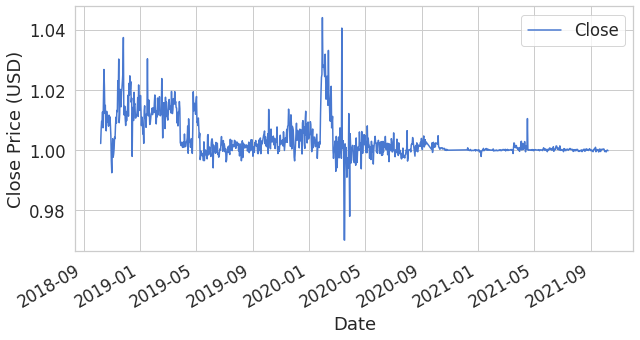

In [94]:
ax = df_usd.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**10. Doge Coin Historic Data**

Text(0, 0.5, 'Close Price (USD)')

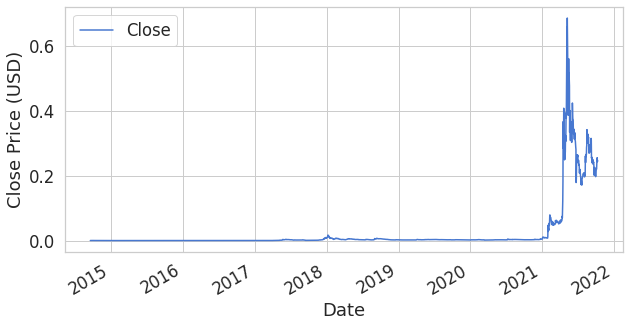

In [95]:
ax = df_doge.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

#**MinMaxScaler**

In [108]:
scaler = MinMaxScaler()
close_price = df_btc.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape)
print(np.isnan(scaled_close).any())
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
print(np.isnan(scaled_close).any())

(2575, 1)
False
False


#**Training & Test Split**

In [122]:
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.9)

In [123]:
X_train.shape

(2227, 99, 1)

In [124]:
X_test.shape

(248, 99, 1)

#**Model Initialization**

In [125]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
model = keras.Sequential()
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
model.add(Dense(units=1))
model.add(Activation('linear'))

In [126]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
model.summary()

In [ ]:
BATCH_SIZE = 1
history = model.fit(
    X_train, 
    y_train, 
    epochs=100,  
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/100
2004/2004 [==============================] - 44s 22ms/step - loss: 9.8568e-05 - val_loss: 0.0270
Epoch 2/100
2004/2004 [==============================] - 44s 22ms/step - loss: 1.4843e-04 - val_loss: 0.0298
Epoch 3/100
2004/2004 [==============================] - 44s 22ms/step - loss: 1.5646e-04 - val_loss: 0.0295
Epoch 4/100
2004/2004 [==============================] - 45s 22ms/step - loss: 1.5509e-04 - val_loss: 0.0282
Epoch 5/100
2004/2004 [==============================] - 44s 22ms/step - loss: 1.5408e-04 - val_loss: 0.0273
Epoch 6/100
2004/2004 [==============================] - 44s 22ms/step - loss: 1.6222e-04 - val_loss: 0.0281
Epoch 7/100
2004/2004 [==============================] - 44s 22ms/step - loss: 1.7690e-04 - val_loss: 0.0261
Epoch 8/100
2004/2004 [==============================] - 44s 22ms/step - loss: 1.7650e-04 - val_loss: 0.0240
Epoch 9/100
2004/2004 [==============================] - 44s 22ms/step - loss: 1.7196e-04 - val_loss: 0.0255
Epoch 10/100
2004/2

In [118]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 21ms/step - loss: 0.0714


0.0714433565735817

#**Loss Plot**

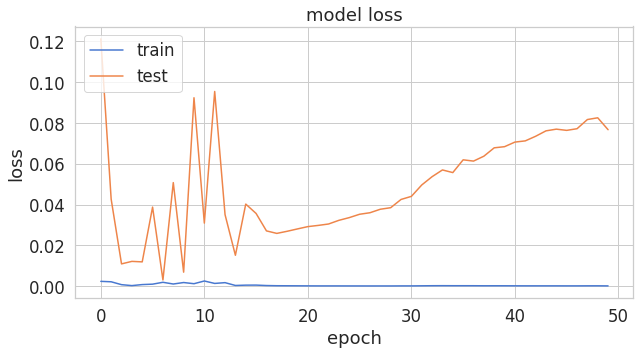

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**Evaluation**

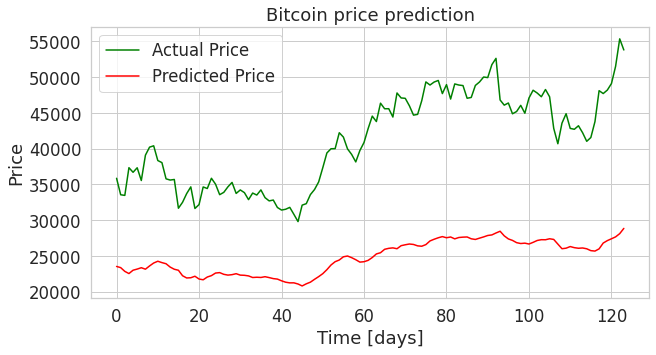

In [120]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();